# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In [1]:
# El mantra de las visualizaciones
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (14., 7.)})
sns.set_style('whitegrid')

import pylab as p
import numpy as np
import pandas as pd
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import zscore
import numpy as np

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [2]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.12934921 2.52134233 2.87321445 2.14152139 2.9530749  2.19078837
 2.3318373  2.60933239 2.33230518 2.91079261]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [3]:
def formula(bot,cei,cou):
    count = uniform.rvs(size=cou)
    tot  = bot + (cei-bot)*count
    return(tot)

How are the two distributions different?

In [4]:
a = formula(10,15,100)
b = formula(10,60,1000)

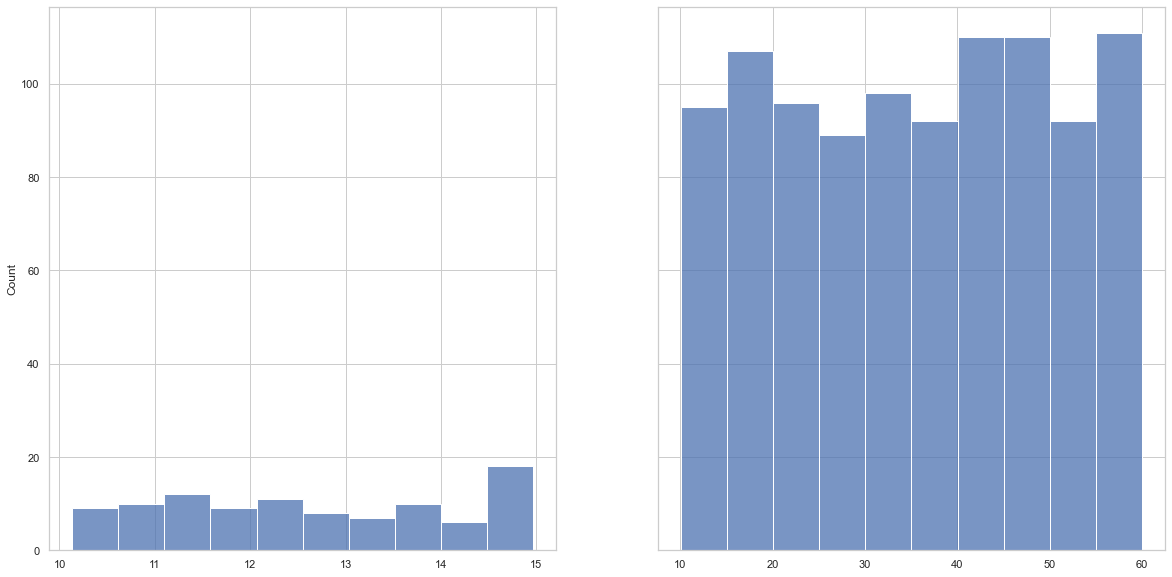

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
sns.histplot(a,ax=axs[0], bins=10)
sns.histplot(b,ax=axs[1], bins=10);

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [6]:
def formula2(mean,sd,cou):
    my_normal = norm(loc=mean, scale=sd)
    randoms = my_normal.rvs(size=cou)
    return(randoms)

In [7]:
c = formula2(10,1,1000)
d = formula2(10,50,1000)

How are the two distributions different?

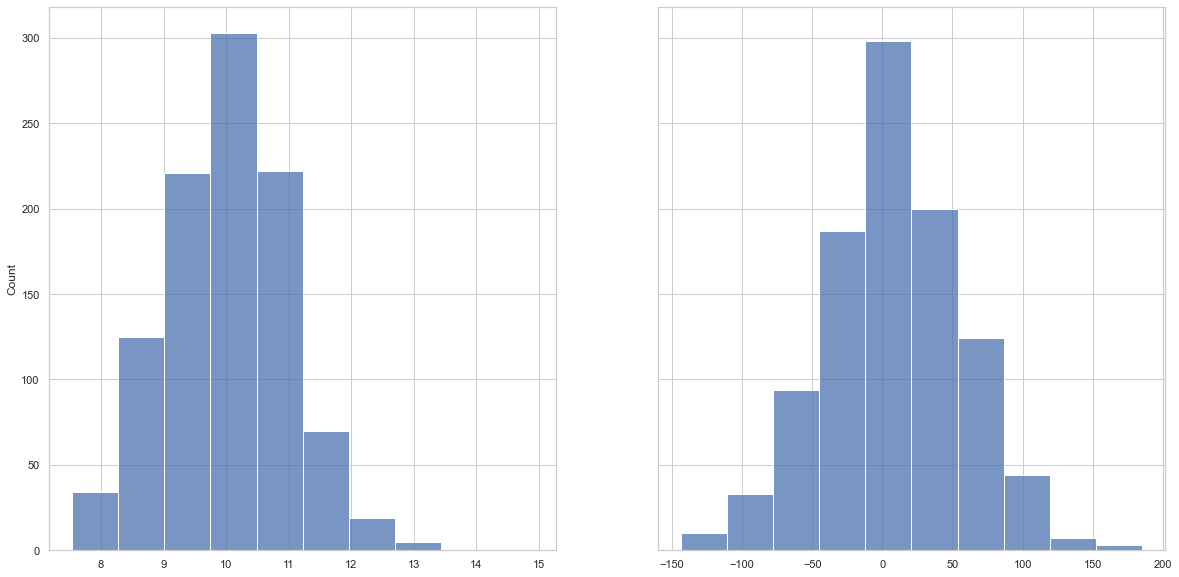

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
sns.histplot(c,ax=axs[0], bins=10)
sns.histplot(d,ax=axs[1], bins=10);

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

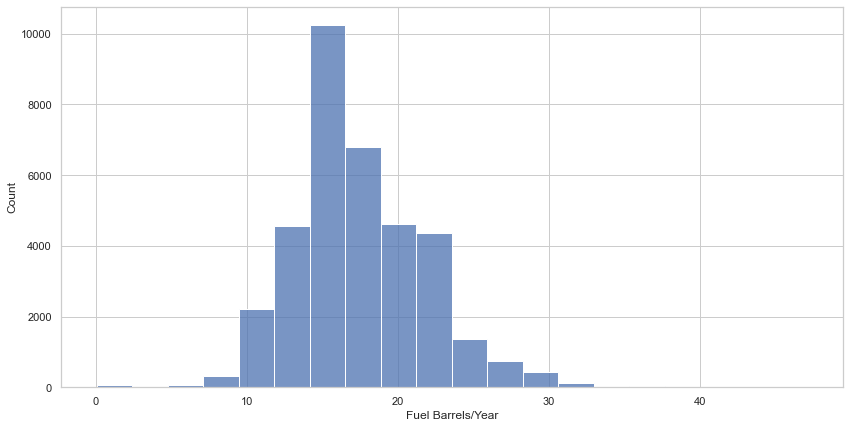

In [9]:
vehicles = pd.read_csv("vehicles.csv",encoding = "ISO-8859-1") 
sns.histplot(x=vehicles["Fuel Barrels/Year"], bins=20);

2. CO2 Emission Grams/Mile 

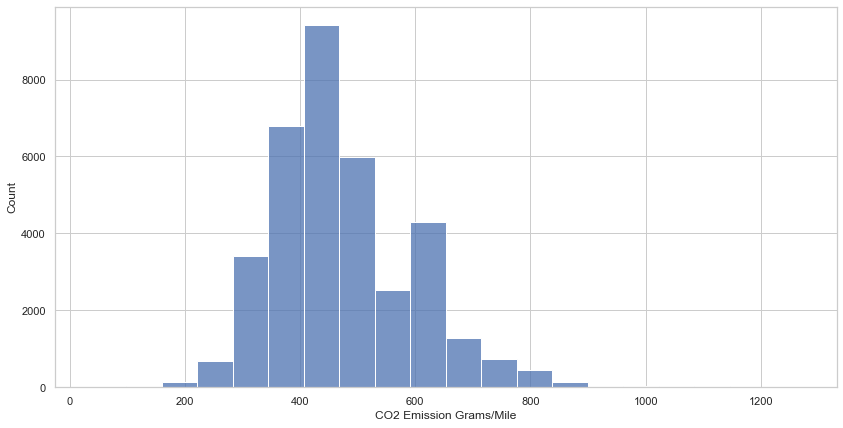

In [10]:
sns.histplot(x=vehicles["CO2 Emission Grams/Mile"], bins=20);

3. Combined MPG

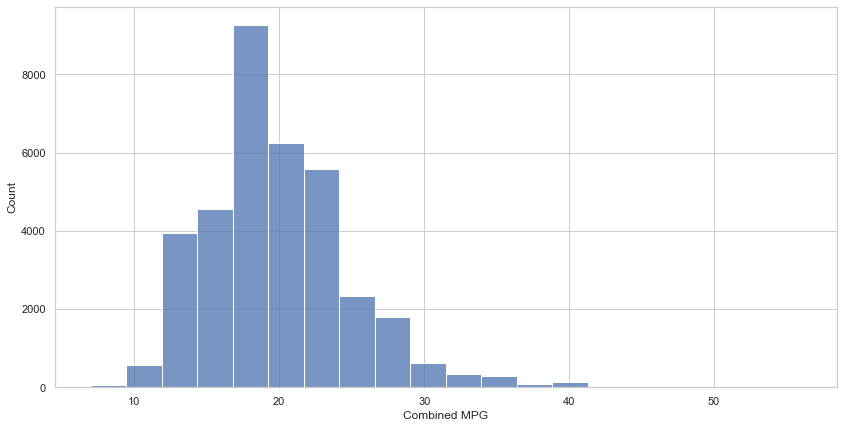

In [11]:
sns.histplot(x=vehicles["Combined MPG"], bins=20);

In [86]:
def isnormal (df, column):
    x = df[[column]].apply(zscore)
    y = round(float(len(x[(x[column]>=-1) & (x[column]<=1)]) / df[[column]].count()),2)
    if y > .682:
        return f'is normal, {y*100}% of data within 1 stdev'
    else:
        return f'is not normal {y*100}% of data within 1 stdev'

Which one(s) of the variables are nearly normally distributed? How do you know?

In [87]:
isnormal(vehicles, "Fuel Barrels/Year")

'is normal, 74.0% of data within 1 stdev'

In [88]:
isnormal(vehicles, "CO2 Emission Grams/Mile")

'is normal, 71.0% of data within 1 stdev'

In [89]:
isnormal(vehicles, "Combined MPG")

'is normal, 75.0% of data within 1 stdev'

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [73]:
def formula3(mean, cou):
    my_e = expon(scale=mean)
    randoms = my_e.rvs(size=cou)
    return(randoms)

In [74]:
e = formula3(10,10)
f = formula3(10,100)

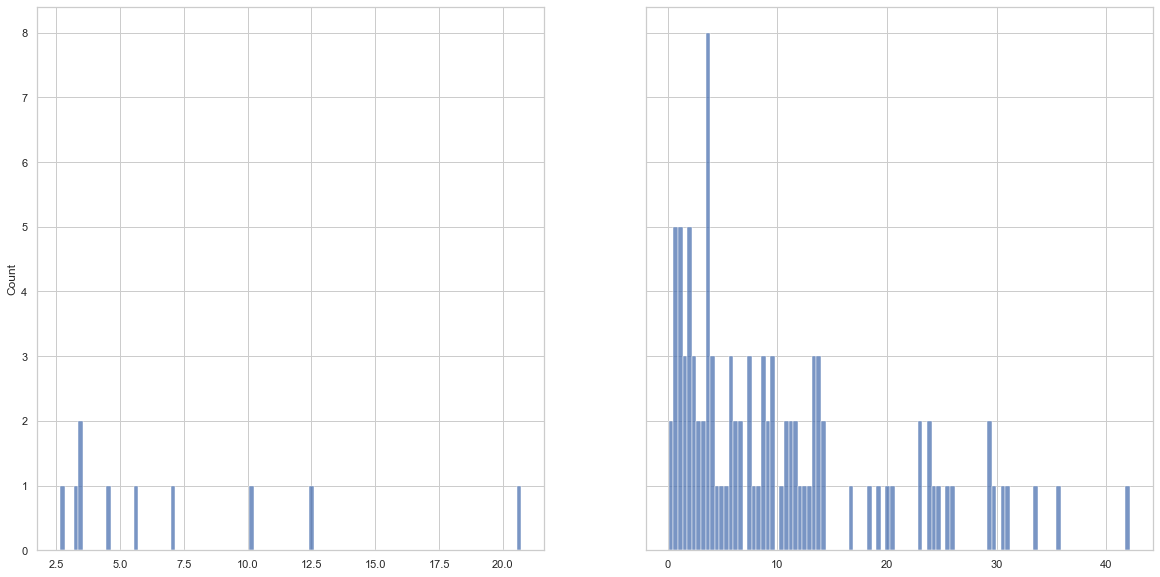

In [75]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey = True)
sns.histplot(e,ax=axs[0], bins=100)
sns.histplot(f,ax=axs[1], bins=100);

How are the two distributions different?

In [76]:
# when the sample is small, it is difficult to observe a distribution.

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [ ]:
# your answer here
# Hint: This is same as saying P(x<15)

In [77]:
my_e = expon(scale=10)
z = my_e.cdf(15)
z

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [90]:
1-z

0.2231301601484298